<a href="https://colab.research.google.com/github/mohamedzaghloul-lab638/Drug-Likeness-Filtering-and-Diversity/blob/main/Lipinski_hopping_in_Doxo_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from rdkit import Chem , DataStructs
from rdkit.Chem import AllChem , Descriptors , Lipinski

In [4]:
dataset=pd.read_csv('/content/PubChem_substance_doxorubicin.csv')
print(dataset.head())


   Compound_CID                        Name  \
0         31703                 Doxorubicin   
1         30323                Daunorubicin   
2         41867                  Epirubicin   
3        443939   Doxorubicin Hydrochloride   
4         62770  Daunorubicin Hydrochloride   

                                            Synonyms Molecular_Formula  \
0  doxorubicin|Adriamycin|23214-92-8|Adriablastin...        C27H29NO11   
1  daunorubicin|Daunomycin|20830-81-3|Acetyladria...        C27H29NO10   
2  Epirubicin|56420-45-2|Epiadriamycin|Epidoxorub...        C27H29NO11   
3  Doxorubicin Hydrochloride|25316-40-9|Doxorubic...      C27H30ClNO11   
4  23541-50-6|DAUNORUBICIN HYDROCHLORIDE|DAUNORUB...      C27H30ClNO10   

                                               InChI  \
0  InChI=1S/C27H29NO11/c1-10-22(31)13(28)6-17(38-...   
1  InChI=1S/C27H29NO10/c1-10-22(30)14(28)7-17(37-...   
2  InChI=1S/C27H29NO11/c1-10-22(31)13(28)6-17(38-...   
3  InChI=1S/C27H29NO11.ClH/c1-10-22(31)13(28)6-1

In [5]:
newdata=dataset[["Compound_CID","Name","SMILES","Molecular_Weight","XLogP","Heavy_Atom_Count","H-Bond_Donor_Count","H-Bond_Acceptor_Count" , "Rotatable_Bond_Count"]]
print(newdata.head())

results=[]
for smi in newdata['SMILES'] :
    mol=Chem.MolFromSmiles(smi)
    if mol is None :continue
    log=Descriptors.MolLogP(mol)
    mw=Descriptors.MolWt(mol)
    hbd=Lipinski.NumHDonors(mol)
    hba=Lipinski.NumHAcceptors(mol)
    rota=Lipinski.NumRotatableBonds(mol)
    violations =0

    if mw > 500 :
     violations +=1
    if log > 5 :
     violations +=1
    if hba > 10 :
     violations +=1
    if hbd > 5 :
     violations +=1
    if rota > 10 :
     violations +=1

    drug_like= violations <2
    if drug_like :
     results.append( {
     "SMILES" : smi ,
"Molecular_Weight" : mw ,
"XLogP" : log ,
"H-Bond_Acceptor_Count" : hba ,
"H-Bond_Donor_Count" : hbd ,
"Rotatable_Bond_Count" : rota ,
                  'Violations': violations,
        'Drug_like': drug_like
                 })
results_df = pd.DataFrame(results)
print(f'results are' , results_df)

   Compound_CID                        Name  \
0         31703                 Doxorubicin   
1         30323                Daunorubicin   
2         41867                  Epirubicin   
3        443939   Doxorubicin Hydrochloride   
4         62770  Daunorubicin Hydrochloride   

                                              SMILES  Molecular_Weight  XLogP  \
0  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             543.5    1.3   
1  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             527.5    1.8   
2  C[C@H]1[C@@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](C...             543.5    1.3   
3  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             580.0    NaN   
4  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             564.0    NaN   

   Heavy_Atom_Count  H-Bond_Donor_Count  H-Bond_Acceptor_Count  \
0              39.0                 6.0                   12.0   
1              38.0                 5.0                   11.0   
2              39.0             

[22:13:09] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:10] WARNING: not removing hydrogen atom without neighbors
[22:13:11] WARNING: not removing hydrogen atom without neighbors
[22:13:11] WARNING: not removing hydrogen atom without neighbors
[22:13:11] WARNING: not removing hydrogen atom without neighbors


results are                                                 SMILES  Molecular_Weight  \
0    C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...           533.961   
1    C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...           497.500   
2    C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...           528.534   
3    CC[C@]1(C[C@@H](C2=C(C1)C(=C3C(=C2O)C(=O)C4=C(...           513.543   
4    CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...           497.500   
..                                                 ...               ...   
336  C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@@H]2C[C@](...           497.500   
337  CC1[C@H]([C@@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C...           511.527   
338  C[C@H]1[C@H]([C@H](CC(O1)O[C@H]2C[C@@H](CC3=C2...           481.501   
339  CC1C(C(CC(O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C...           535.977   
340  CC1C(C(CC(O1)O[C@H]2CC[C@@](C3=C2C(=C4C(=C3C)C...           481.545   

       XLogP  H-Bond_Acceptor_Count  H-Bond_Donor_Count  Rotatable_Bond_Cou

In [6]:
print(len(dataset))
print(len(results_df))

2644
341


In [7]:
# minimize to 0 violations
newdata=dataset[["Compound_CID","Name","SMILES","Molecular_Weight","XLogP","Heavy_Atom_Count","H-Bond_Donor_Count","H-Bond_Acceptor_Count" , "Rotatable_Bond_Count"]]
print(newdata.head())

results=[]
for smi in newdata['SMILES'] :
    mol=Chem.MolFromSmiles(smi)
    if mol is None :continue
    log=Descriptors.MolLogP(mol)
    mw=Descriptors.MolWt(mol)
    hbd=Lipinski.NumHDonors(mol)
    hba=Lipinski.NumHAcceptors(mol)
    rota=Lipinski.NumRotatableBonds(mol)
    violations =0

    if mw > 500 :
     violations +=1
    if log > 5 :
     violations +=1
    if hba > 10 :
     violations +=1
    if hbd > 5 :
     violations +=1
    if rota > 10 :
     violations +=1


    if  violations ==0 :
     results.append( {
     "SMILES" : smi ,
"Molecular_Weight" : mw ,
"XLogP" : log ,
"H-Bond_Acceptor_Count" : hba ,
"H-Bond_Donor_Count" : hbd ,
"Rotatable_Bond_Count" : rota ,
                  'Violations': violations,
        'Drug_like': drug_like
                 })
new_results_df = pd.DataFrame(results)
print(f'results are' , new_results_df)

   Compound_CID                        Name  \
0         31703                 Doxorubicin   
1         30323                Daunorubicin   
2         41867                  Epirubicin   
3        443939   Doxorubicin Hydrochloride   
4         62770  Daunorubicin Hydrochloride   

                                              SMILES  Molecular_Weight  XLogP  \
0  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             543.5    1.3   
1  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             527.5    1.8   
2  C[C@H]1[C@@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](C...             543.5    1.3   
3  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             580.0    NaN   
4  C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...             564.0    NaN   

   Heavy_Atom_Count  H-Bond_Donor_Count  H-Bond_Acceptor_Count  \
0              39.0                 6.0                   12.0   
1              38.0                 5.0                   11.0   
2              39.0             

[22:13:18] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors
[22:13:19] WARNING: not removing hydrogen atom without neighbors


results are                                                SMILES  Molecular_Weight  \
0   C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...           497.500   
1   CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...           497.500   
2   C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@@H]2C[C@](CC...           497.500   
3   CC1CC(CC(O1)O[C@H]2CC(CC3=C2C(=C4C(=C3O)C(=O)C...           495.528   
4   CC1CC(CC(O1)O[C@H]2CC(=CC3=C2C(=C4C(=C3O)C(=O)...           493.512   
..                                                ...               ...   
94  CC1C(C(CC(O1)O[C@H]2C[C@@](CC3=C(C4=C(C=C23)C(...           497.500   
95  C[C@@H]1CC(O[C@@H]([C@@H]1O)N)O[C@H]2C[C@@](CC...           497.500   
96  C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@@H]2C[C@](...           497.500   
97  C[C@H]1[C@H]([C@H](CC(O1)O[C@H]2C[C@@H](CC3=C2...           481.501   
98  CC1C(C(CC(O1)O[C@H]2CC[C@@](C3=C2C(=C4C(=C3C)C...           481.545   

      XLogP  H-Bond_Acceptor_Count  H-Bond_Donor_Count  Rotatable_Bond_Count  \
0   1.0

In [9]:
from google.colab import files
new_results_df.to_excel('new_results.xlsx' , index=False)
files.download('new_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# narrowing the search with Tanimoto
ref_smi = "C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)O" # Doxo
ref_mol = Chem.MolFromSmiles( ref_smi)
from rdkit.Chem import rdFingerprintGenerator
gen = rdFingerprintGenerator.GetMorganGenerator()
ref_fp=gen.GetFingerprint(ref_mol)

container = [ m for m in new_results_df['SMILES']]
print(len( container))

similarities= []
for smi in container :
  mols = Chem.MolFromSmiles(smi)

  fp=gen.GetFingerprint(mols)
  sim=DataStructs.TanimotoSimilarity( ref_fp , fp)

  similarities.append ((smi , sim))




99


In [9]:
print(len(similarities))

99


In [10]:
similarities.sort ( key=lambda x :x[1] , reverse=True )
for smi , sim in similarities :
  print (smi , sim)

CC1C(C(CC(O1)O[C@H]2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)C)N)O 0.7766990291262136
CC1C(C(CC(O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O)N)O 0.7452830188679245
CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O)N)O 0.7452830188679245
COC1=CC=CC2=C1C(=O)C3=C(C4=C(CC(CC4OC5CCCCO5)(C(=O)CO)O)C(=C3C2=O)O)O 0.6818181818181818
CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O 0.6454545454545455
CC1C(C(CC(O1)O[C@H]2C[C@H](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O 0.6454545454545455
C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@H]2C[C@H](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O 0.6454545454545455
C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@H]2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)C)N)O 0.6306306306306306
C[C@H]1C[C@@H](O[C@H]([C@H]1O)C)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O 0.6052631578947368
CC1CC(OC(C1O)C)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C

In [11]:
# minmize results to > 60% similarity
filter = [smi for smi , sim in similarities if sim >= 0.6]
print(len(filter))

for smi in similarities :
   if smi[1] >= 0.6 :
    print(smi )


34
('CC1C(C(CC(O1)O[C@H]2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)C)N)O', 0.7766990291262136)
('CC1C(C(CC(O1)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O)N)O', 0.7452830188679245)
('CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O)N)O', 0.7452830188679245)
('COC1=CC=CC2=C1C(=O)C3=C(C4=C(CC(CC4OC5CCCCO5)(C(=O)CO)O)C(=C3C2=O)O)O', 0.6818181818181818)
('CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O', 0.6454545454545455)
('CC1C(C(CC(O1)O[C@H]2C[C@H](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O', 0.6454545454545455)
('C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@H]2C[C@H](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)O)N)O', 0.6454545454545455)
('C[C@@H]1[C@@H]([C@@H](C[C@H](O1)O[C@H]2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)C)N)O', 0.6306306306306306)
('C[C@H]1C[C@@H](O[C@H]([C@H]1O)C)O[C@H]2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C)O', 0.6052631578947368)
('CC1CC(OC(C1O)C)O[C@H]2C[C@@]

In [21]:
# maxmin
# mols from smiles
mols=[]
for m in filter :
  mol=Chem.MolFromSmiles(m)
  if mol:
    mols.append(mol)
print(len(mols))

# fps
gen = rdFingerprintGenerator.GetMorganGenerator()
fps = [gen.GetFingerprint(m) for m in mols]
# distance fun.
def distij(i,j,fps=fps):
 return 1-DataStructs.TanimotoSimilarity(fps[i],fps[j])
# picker set
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()
pickerindices = picker.LazyPick( distij , len(fps) , 20 , seed=23)

print("selected indices are :" , list(pickerindices))
print("smiles  :" , [Chem.MolToSmiles(mols[i]) for i in pickerindices])


34
selected indices are : [17, 3, 4, 8, 0, 7, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]
smiles  : ['CC(=O)[C@]1(O)Cc2c(O)c3c(c(O)c2[C@H](O[C@H]2C[C@H](N)[C@H](O)[C@H](C)O2)C1)C(=O)c1ccccc1C3=O', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=O)CO)CC3OC1CCCCO1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)CC3OC1CC(N)C(O)C(C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(O)C[C@@H]3O[C@H]1C[C@H](C)[C@H](O)[C@H](C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)(C)C[C@@H]3OC1CC(N)C(O)C(C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)C[C@@H]3O[C@@H]1C[C@@H](N)[C@@H](O)[C@@H](C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(O)C[C@@H]3OC1CC(N)C(O)C(C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)(O)CC3OC1CC(N)C(O)C(C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)C(O)C(C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3O[C@@H]1C[C@@H](N)[C@@H](O)[C@@H](C)O1', 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(O)C[C@@H]3OC1CC(C)C(O)C(C)O1', 'CC

In [54]:
selected_indices=list(pickerindices)
smiles_indices =[Chem.MolToSmiles(mols[i]) for i in pickerindices]

divers=[similarities[i][1] for i in pickerindices]
divers_perc = [round(x*100, 3) for x in divers if x is not None]

import pandas as pd

data_results=pd.DataFrame (
    {" smiles" : smiles_indices ,
    "No." :selected_indices,
     "similarity %" :divers,
     })

print(data_results)
from google.colab import files
data_results.to_excel('data_results.xlsx' , index=False)
files.download('data_results.xlsx')

                                               smiles  No.  similarity %
0   CC(=O)[C@]1(O)Cc2c(O)c3c(c(O)c2[C@H](O[C@H]2C[...   17      0.600000
1   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...    3      0.681818
2   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)CC3O...    4      0.645455
3   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(...    8      0.605263
4   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)(C)C...    0      0.776699
5   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)C[C@...    7      0.630631
6   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(...    1      0.745283
7   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(C)(O)C...    2      0.745283
8   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)...    5      0.645455
9   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)...    6      0.645455
10  COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@](C)(...    9      0.605263
11  CC(=O)[C@]1(O)Cc2c(O)c3c(c(O)c2[C@@H](O[C@H]2C...   10      0.600000
12  CC(=O)C1(O)Cc2c(O)c3c(c(O)c2C(OC2CC(N)C(O)C(C).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
print(data_results.columns)

Index([' smiles', 'No.', 'similarity %'], dtype='object')


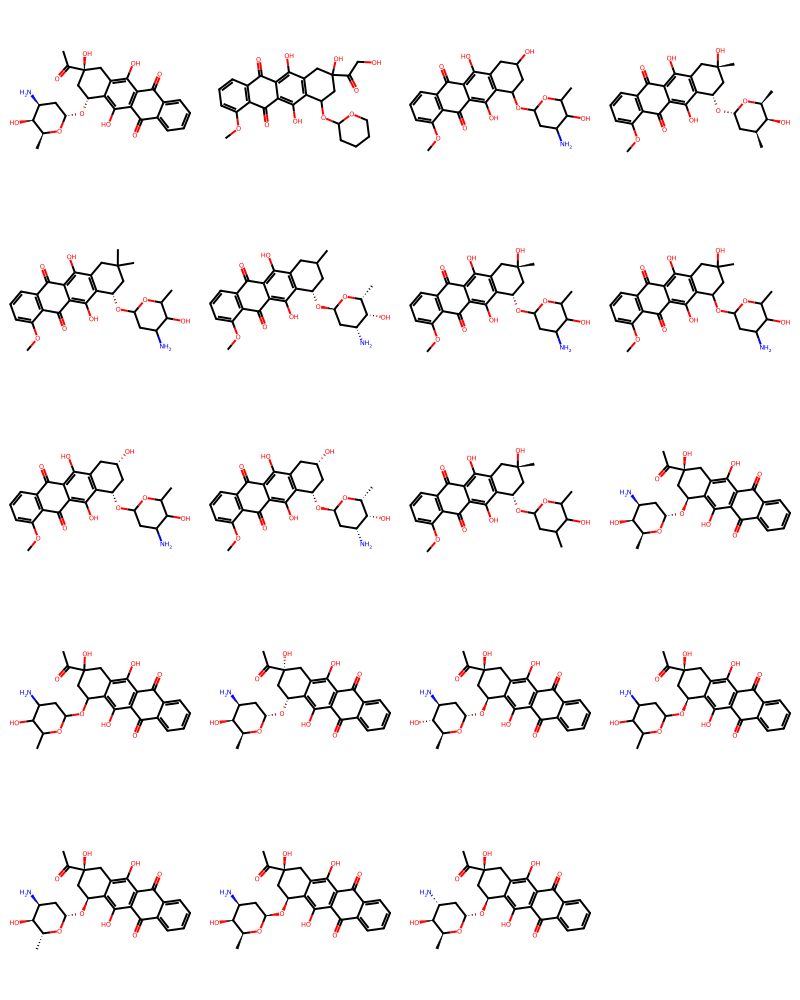

In [69]:
from rdkit.Chem import Draw


selected_smiles = data_results[' smiles'][:19]

mols = [Chem.MolFromSmiles(smi) for smi in selected_smiles if Chem.MolFromSmiles(smi)]
img=Draw.MolsToGridImage(
       mols , molsPerRow= 4 , subImgSize=(200,200)

   )
display(img)
